In [12]:
# coding=utf-8
from scapy.all import *
import binascii
import socket, struct
import time

import crcmod
import libnum

from scapy.layers.inet import IP, UDP
from scapy.layers.l2 import Ether

import sys
sys.path.append('/home/xalanaseon/scapy-cip-enip')
from cip import CIP, CIP_Path
import cip
import numpy as np

plc_cube = []
hmi_cube = []

#seq = []

def ip2long(ip):
    """
    Convert an IP string to long
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

def packet_analysis(pkt):
    if TCP in pkt and IP in pkt:
        #if pkt[TCP].seq not in seq:
        d_time = float(str(pkt.time))
        #seq.append(pkt[TCP].seq)
        if(pkt[TCP].dport == 44818 and len(pkt[TCP].payload)>0):
            s_ip = ip2long(pkt[IP].src)
            d_ip = ip2long(pkt[IP].dst)
            hmi_cube.append(np.asarray([s_ip,d_ip,d_time]))
        if(pkt[TCP].sport == 44818 and len(pkt[TCP].payload)>0):
            s_ip = ip2long(pkt[IP].src)
            d_ip = ip2long(pkt[IP].dst)
            plc_cube.append(np.asarray([s_ip,d_ip,d_time]))

In [13]:
try:
    #print(ifaces)
    #sniff(iface="Realtek PCIe GbE Family Controller", prn=packet_analysis, filter="udp port 18507")
    sniff(offline='DataSet/Dec2019_00000_20191206100500.pcap', prn=packet_analysis, store=0, count=20000, filter="host 192.168.1.10 and host 192.168.1.20")
    plc_cube = np.asarray(plc_cube)
    hmi_cube = np.asarray(hmi_cube)
    print('Completed')

except Exception as sniff_dec_err:
    traceback.print_exc()
    print(str(sniff_dec_err))

Completed


In [14]:
print(hmi_cube.shape)
print(plc_cube.shape)
print(plc_cube[2][0])
dst1 = hmi_cube[hmi_cube[:,0]==[ip2long('192.168.1.10')]]
dst2 = dst1[dst1[:,1]==[ip2long('192.168.1.20')]]
normal_hmi = dst2[:,2]
print("Sliding Windows Timespan (Normal) :",max(normal_hmi)-min(normal_hmi))
dst1 = plc_cube[plc_cube[:,0]==[ip2long('192.168.1.20')]]
dst2 = dst1[dst1[:,1]==[ip2long('192.168.1.10')]]
normal_plc = dst2[:,2]

(9094, 3)
(9091, 3)
3232235796.0
Sliding Windows Timespan (Normal) : 18.45191788673401


In [15]:
# coding=utf-8
from scapy.all import *
import binascii
import socket, struct
import time

import crcmod
import libnum

from scapy.layers.inet import IP, UDP
from scapy.layers.l2 import Ether

import sys
sys.path.append('/home/xalanaseon/scapy-cip-enip')
from cip import CIP, CIP_Path
import cip
import numpy as np

plc_cube = []
hmi_cube = []

#seq = []

def ip2long(ip):
    """
    Convert an IP string to long
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

def packet_analysis(pkt):
    if TCP in pkt and IP in pkt:
        #if pkt[TCP].seq not in seq:
        d_time = float(str(pkt.time))
        #seq.append(pkt[TCP].seq)
        if(pkt[TCP].dport == 44818 and len(pkt[TCP].payload)>0):
            s_ip = ip2long(pkt[IP].src)
            d_ip = ip2long(pkt[IP].dst)
            hmi_cube.append(np.asarray([s_ip,d_ip,d_time]))
            if CIP not in pkt:
                print(pkt.summary())
                print(binascii.hexlify(bytes(pkt)))
        if(pkt[TCP].sport == 44818 and len(pkt[TCP].payload)>0):
            s_ip = ip2long(pkt[IP].src)
            d_ip = ip2long(pkt[IP].dst)
            plc_cube.append(np.asarray([s_ip,d_ip,d_time]))


In [16]:
try:
    #print(ifaces)
    #sniff(iface="Realtek PCIe GbE Family Controller", prn=packet_analysis, filter="udp port 18507")
    sniff(offline='DataSet/Dex2019_0001_attack4.pcap', prn=packet_analysis, store=0, count=20000, filter="host 192.168.1.10 and host 192.168.1.20")
    plc_cube = np.asarray(plc_cube)
    hmi_cube = np.asarray(hmi_cube)
    print('Completed')

except Exception as sniff_dec_err:
    traceback.print_exc()
    print(str(sniff_dec_err))

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028b77040004006fff0c0a8010ac0a80114d94baf12311b70bbe50e148c50101fcee8c70000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028b87040004006fef0c0a8010ac0a80114d94baf12311b70bbe50e14c650101fc6e8950000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028b97040004006fdf0c0a8010ac0a80114d94baf12311b70bbe50e152850101f9ee85b0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ba7040004006fcf0c0a8010ac0a80114d94baf12311b70bbe50e155a50101fcee7f90000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028bb7040004006fbf0c0a8010ac0a80114d94baf12311b70bbe50e159250101fc8e7c70000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002826714000400690f0c0a8010ac0a80114d94baf12311b8015e50e21a850101fcecc510000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000282771400040068ff0c0a8010ac0a80114d94baf12311b8015e50e220a50101f9ecc1f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000282a71400040068cf0c0a8010ac0a80114d94baf12311b8099e50e223c50101fcecb390000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000282b71400040068bf0c0a8010ac0a80114d94baf12311b8099e50e226e50101fcecb070000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000282c71400040068af0c0a8010ac0a80114d94baf12311b8099e50e22a850101f94cb070000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000288c71400040062af0c0a8010ac0a80114d94baf12311b8dc1e50e2e2650101f94b2610000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000288e714000400628f0c0a8010ac0a80114d94baf12311b8e07e50e2e5850101fceb1af0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000288f714000400627f0c0a8010ac0a80114d94baf12311b8e07e50e2e8a50101fceb17d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002890714000400626f0c0a8010ac0a80114d94baf12311b8e07e50e2eec50101f9eb14b0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002891714000400625f0c0a8010ac0a80114d94baf12311b8e07e50e2f2450101fc8b0e90000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028e37140004006d3efc0a8010ac0a80114d94baf12311b99cde50e386c50101fce9bd50000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028e47140004006d2efc0a8010ac0a80114d94baf12311b99cde50e38ce50101f9e9ba30000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028e67140004006d0efc0a8010ac0a80114d94baf12311b9a13e50e390050101fce9afb0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028e97140004006cdefc0a8010ac0a80114d94baf12311b9a9de50e393250101fce9a3f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ea7140004006ccefc0a8010ac0a80114d94baf12311b9a9de50e396c50101f949a3f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000283f724000400677efc0a8010ac0a80114d94baf12311ba5dbe50e43ec50101fc6844f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002842724000400674efc0a8010ac0a80114d94baf12311ba65fe50e444e50101f9e83910000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002843724000400673efc0a8010ac0a80114d94baf12311ba65fe50e448050101fce832f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000284972400040066defc0a8010ac0a80114d94baf12311ba7bfe50e44b250101fce819d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000284b72400040066befc0a8010ac0a80114d94baf12311ba805e50e44ea50101fc881250000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028b2724000400604efc0a8010ac0a80114d94baf12311bb5b1e50e51c450101fce66990000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028b3724000400603efc0a8010ac0a80114d94baf12311bb5b1e50e51fe50101fc666670000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028b87240004006feeec0a8010ac0a80114d94baf12311bb6c5e50e523050101fce65190000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028b97240004006fdeec0a8010ac0a80114d94baf12311bb6c5e50e526850101fc864e70000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ba7240004006fceec0a8010ac0a80114d94baf12311bb6c5e50e52ca50101f9e64af0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000280c7340004006aaeec0a8010ac0a80114d94baf12311bc247e50e5c3e50101fce4f890000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000280d7340004006a9eec0a8010ac0a80114d94baf12311bc247e50e5ca050101f9e4f570000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000280e7340004006a8eec0a8010ac0a80114d94baf12311bc247e50e5cda50101f644f570000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000280f7340004006a7eec0a8010ac0a80114d94baf12311bc247e50e5d0c50101fce4ebb0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028127340004006a4eec0a8010ac0a80114d94baf12311bc2d7e50e5d3e50101fce4df90000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002860734000400656eec0a8010ac0a80114d94baf12311bcd7de50e66b650101fce39db0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002862734000400654eec0a8010ac0a80114d94baf12311bcdc9e50e66e850101fce395d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002866734000400650eec0a8010ac0a80114d94baf12311bce93e50e671a50101fce38610000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000286773400040064feec0a8010ac0a80114d94baf12311bce93e50e677c50101f9e382f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000286873400040064eeec0a8010ac0a80114d94baf12311bce93e50e67b650101fc637cd0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028c37340004006f3edc0a8010ac0a80114d94baf12311bdb6fe50e722e50101fce20710000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028c47340004006f2edc0a8010ac0a80114d94baf12311bdb6fe50e726850101fc6203f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028c57340004006f1edc0a8010ac0a80114d94baf12311bdb6fe50e729a50101fce20050000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028c67340004006f0edc0a8010ac0a80114d94baf12311bdb6fe50e72d250101fc81fd30000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028c77340004006efedc0a8010ac0a80114d94baf12311bdb6fe50e733450101f9e1f9b0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000281a74400040069cedc0a8010ac0a80114d94baf12311be737e50e7cd850101fce09ff0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000281d744000400699edc0a8010ac0a80114d94baf12311be7bbe50e7d0a50101fce09490000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000281e744000400698edc0a8010ac0a80114d94baf12311be7bbe50e7d4450101f9409490000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000281f744000400697edc0a8010ac0a80114d94baf12311be7bbe50e7d7c50101fc808dd0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002820744000400696edc0a8010ac0a80114d94baf12311be7bbe50e7dde50101f9e08a50000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002871744000400645edc0a8010ac0a80114d94baf12311bf33de50e872050101fc8f3b60000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002872744000400644edc0a8010ac0a80114d94baf12311bf33de50e875250101fcef37e0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002874744000400642edc0a8010ac0a80114d94baf12311bf387e50e87b450101f9ef3020000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002875744000400641edc0a8010ac0a80114d94baf12311bf387e50e87e650101fcef2a00000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287774400040063fedc0a8010ac0a80114d94baf12311bf3cde50e882050101fc6f2280000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028de7440004006d8ecc0a8010ac0a80114d94baf12311c0251e50e940450101fced7b80000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028df7440004006d7ecc0a8010ac0a80114d94baf12311c0251e50e943650101fced7860000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028e07440004006d6ecc0a8010ac0a80114d94baf12311c0251e50e946e50101fc8d7540000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028e17440004006d5ecc0a8010ac0a80114d94baf12311c0251e50e94d050101f9ed71c0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028e37440004006d3ecc0a8010ac0a80114d94baf12311c029be50e950250101fced6700000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002836754000400680ecc0a8010ac0a80114d94baf12311c0de9e50e9f2650101fcec0fe0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000283775400040067fecc0a8010ac0a80114d94baf12311c0de9e50e9f5e50101fc8c0cc0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000283d754000400679ecc0a8010ac0a80114d94baf12311c0f49e50e9fc050101f9ebf340000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000283f754000400677ecc0a8010ac0a80114d94baf12311c0f8fe50e9ff250101fcebe8c0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002840754000400676ecc0a8010ac0a80114d94baf12311c0f8fe50ea02450101fcebe5a0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002892754000400624ecc0a8010ac0a80114d94baf12311c1a7fe50eaa3a50101fcea9540000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000289775400040061fecc0a8010ac0a80114d94baf12311c1b95e50eaa6c50101fcea80c0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000289975400040061decc0a8010ac0a80114d94baf12311c1bdfe50eaa9e50101fcea7900000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000289a75400040061cecc0a8010ac0a80114d94baf12311c1bdfe50eab0050101f6ca7900000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000289c75400040061aecc0a8010ac0a80114d94baf12311c1c25e50eab3a50101fc6a6b60000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028f17540004006c5ebc0a8010ac0a80114d94baf12311c279be50eb5aa50101f9e90f80000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028f27540004006c4ebc0a8010ac0a80114d94baf12311c279be50eb5e250101f7e90e00000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028f57540004006c1ebc0a8010ac0a80114d94baf12311c282be50eb61450101fce8fce0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028f67540004006c0ebc0a8010ac0a80114d94baf12311c282be50eb64e50101fc68f9c0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028fa7540004006bcebc0a8010ac0a80114d94baf12311c28f5e50eb68050101fce8e980000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000284a76400040066cebc0a8010ac0a80114d94baf12311c33e5e50ec02450101fce7a040000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000284b76400040066bebc0a8010ac0a80114d94baf12311c33e5e50ec05650101fce79d20000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000284c76400040066aebc0a8010ac0a80114d94baf12311c33e5e50ec08e50101fc879a00000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000284f764000400667ebc0a8010ac0a80114d94baf12311c3477e50ec0f050101f9e78d60000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002850764000400666ebc0a8010ac0a80114d94baf12311c3477e50ec12250101fce78740000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028a976400040060debc0a8010ac0a80114d94baf12311c410de50ecb6a50101fc8619c0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028aa76400040060cebc0a8010ac0a80114d94baf12311c410de50ecbcc50101f9e61640000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ab76400040060bebc0a8010ac0a80114d94baf12311c410de50ecc0650101f6461640000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ac76400040060aebc0a8010ac0a80114d94baf12311c410de50ecc3850101fce60c80000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ad764000400609ebc0a8010ac0a80114d94baf12311c410de50ecc6a50101fce60960000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000280e7740004006a8eac0a8010ac0a80114d94baf12311c4eb9e50ed7e250101f9e47a20000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028117740004006a5eac0a8010ac0a80114d94baf12311c4f4be50ed81450101fce46ae0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028127740004006a4eac0a8010ac0a80114d94baf12311c4f4be50ed84650101fce467c0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028137740004006a3eac0a8010ac0a80114d94baf12311c4f4be50ed87e50101fc8464a0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028167740004006a0eac0a8010ac0a80114d94baf12311c4fcfe50ed8b050101fce458e0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002865774000400651eac0a8010ac0a80114d94baf12311c5a81e50ee25c50101fce31300000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000286977400040064deac0a8010ac0a80114d94baf12311c5b51e50ee28e50101fce302e0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000286a77400040064ceac0a8010ac0a80114d94baf12311c5b51e50ee2c650101fc82ffc0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000286b77400040064beac0a8010ac0a80114d94baf12311c5b51e50ee32850101f9e2fc40000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000286d774000400649eac0a8010ac0a80114d94baf12311c5b97e50ee35a50101fce2f1c0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028c07740004006f6e9c0a8010ac0a80114d94baf12311c6759e50eecdc50101fce19d80000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028c17740004006f5e9c0a8010ac0a80114d94baf12311c6759e50eed3e50101f9e19a60000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028c37740004006f3e9c0a8010ac0a80114d94baf12311c67a5e50eed7050101fce18f80000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028c47740004006f2e9c0a8010ac0a80114d94baf12311c67a5e50eeda250101fce18c60000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028c57740004006f1e9c0a8010ac0a80114d94baf12311c67a5e50eeddc50101f9418c60000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000281f784000400697e9c0a8010ac0a80114d94baf12311c7443e50ef82c50101f9401d80000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002820784000400696e9c0a8010ac0a80114d94baf12311c7443e50ef88e50101f3201d80000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002821784000400695e9c0a8010ac0a80114d94baf12311c7443e50ef8c050101fce010a0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002822784000400694e9c0a8010ac0a80114d94baf12311c7443e50ef8f850101fc800d80000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000282778400040068fe9c0a8010ac0a80114d94baf12311c7559e50ef92a50101fceff890000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287f784000400637e9c0a8010ac0a80114d94baf12311c8129e50f03de50101fc6e90d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002880784000400636e9c0a8010ac0a80114d94baf12311c8129e50f041050101f94e90d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002881784000400635e9c0a8010ac0a80114d94baf12311c8129e50f044850101fc8e8a10000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002884784000400632e9c0a8010ac0a80114d94baf12311c81b1e50f04aa50101f9ee7e10000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000288878400040062ee9c0a8010ac0a80114d94baf12311c8289e50f04dc50101fcee6a70000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028f37840004006c3e8c0a8010ac0a80114d94baf12311c9149e50f118650101fcecb3d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028f47840004006c2e8c0a8010ac0a80114d94baf12311c9149e50f11be50101fc8cb0b0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028f57840004006c1e8c0a8010ac0a80114d94baf12311c9149e50f11f850101fc6cad30000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028f77840004006bfe8c0a8010ac0a80114d94baf12311c918fe50f125a50101f9eca530000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028f87840004006bee8c0a8010ac0a80114d94baf12311c918fe50f128c50101fcec9f10000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000284979400040066de8c0a8010ac0a80114d94baf12311c9c7fe50f1c6850101f9eb5550000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000284f794000400667e8c0a8010ac0a80114d94baf12311c9de7e50f1c9a50101fceb38b0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002850794000400666e8c0a8010ac0a80114d94baf12311c9de7e50f1ccc50101fceb3590000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002852794000400664e8c0a8010ac0a80114d94baf12311c9e25e50f1cfe50101fceb2e90000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002853794000400663e8c0a8010ac0a80114d94baf12311c9e25e50f1d3850101fc6b2b70000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028a879400040060ee8c0a8010ac0a80114d94baf12311ca9ede50f277c50101f9e9cd30000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ab79400040060be8c0a8010ac0a80114d94baf12311caa79e50f27ae50101fce9be50000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ac79400040060ae8c0a8010ac0a80114d94baf12311caa79e50f27e050101fce9bb30000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ae794000400608e8c0a8010ac0a80114d94baf12311caab7e50f281a50101fc69b430000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028af794000400607e8c0a8010ac0a80114d94baf12311caab7e50f284c50101fce9b090000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028107a40004006a6e7c0a8010ac0a80114d94baf12311cb86fe50f339250101fce820b0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028117a40004006a5e7c0a8010ac0a80114d94baf12311cb86fe50f33c450101fce81d90000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028127a40004006a4e7c0a8010ac0a80114d94baf12311cb86fe50f342650101f6c81d90000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028137a40004006a3e7c0a8010ac0a80114d94baf12311cb86fe50f345e50101f3481d90000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028147a40004006a2e7c0a8010ac0a80114d94baf12311cb86fe50f349850101fc6810d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028767a4000400640e7c0a8010ac0a80114d94baf12311cc669e50f3fde50101f9e67f50000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028777a400040063fe7c0a8010ac0a80114d94baf12311cc669e50f401050101fce67930000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028797a400040063de7c0a8010ac0a80114d94baf12311cc6a7e50f404250101fce67230000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287a7a400040063ce7c0a8010ac0a80114d94baf12311cc6a7e50f407c50101fc666f10000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287b7a400040063be7c0a8010ac0a80114d94baf12311cc6a7e50f40ae50101fce66b70000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d37a40004006e3e6c0a8010ac0a80114d94baf12311cd2d1e50f4b6a50101f9e50010000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d77a40004006dfe6c0a8010ac0a80114d94baf12311cd3a7e50f4b9c50101fce4ec90000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d97a40004006dde6c0a8010ac0a80114d94baf12311cd3e5e50f4bce50101fce4e590000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028da7a40004006dce6c0a8010ac0a80114d94baf12311cd3e5e50f4c0050101fce4e270000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028db7a40004006dbe6c0a8010ac0a80114d94baf12311cd3e5e50f4c3a50101fc64df50000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028487b400040066ee6c0a8010ac0a80114d94baf12311ce2f9e50f592250101fce31f10000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000284c7b400040066ae6c0a8010ac0a80114d94baf12311ce3cfe50f595450101fce30e90000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000284d7b4000400669e6c0a8010ac0a80114d94baf12311ce3cfe50f598e50101fc630b70000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000284e7b4000400668e6c0a8010ac0a80114d94baf12311ce3cfe50f59f050101f9e307d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000284f7b4000400667e6c0a8010ac0a80114d94baf12311ce3cfe50f5a2250101fce301b0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028a97b400040060de6c0a8010ac0a80114d94baf12311cf01be50f64d450101fce191d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028aa7b400040060ce6c0a8010ac0a80114d94baf12311cf01be50f653650101f9e18eb0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ab7b400040060be6c0a8010ac0a80114d94baf12311cf01be50f656e50101fc818890000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028b27b4000400604e6c0a8010ac0a80114d94baf12311cf1c1e50f65a050101fce16ab0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028b37b4000400603e6c0a8010ac0a80114d94baf12311cf1c1e50f65d250101fce16790000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000280b7c40004006abe5c0a8010ac0a80114d94baf12311cfd43e50f70e850101fceffe00000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028127c40004006a4e5c0a8010ac0a80114d94baf12311cfee9e50f711a50101fcefe080000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028137c40004006a3e5c0a8010ac0a80114d94baf12311cfee9e50f714c50101fcefdd60000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028147c40004006a2e5c0a8010ac0a80114d94baf12311cfee9e50f718450101fc8fda40000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028157c40004006a1e5c0a8010ac0a80114d94baf12311cfee9e50f71e650101f9efd6c0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028787c400040063ee5c0a8010ac0a80114d94baf12311d0c95e50f7d9250101fcee3e40000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028797c400040063de5c0a8010ac0a80114d94baf12311d0c95e50f7dc450101fcee3b20000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287a7c400040063ce5c0a8010ac0a80114d94baf12311d0c95e50f7dfe50101f94e3b20000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287b7c400040063be5c0a8010ac0a80114d94baf12311d0c95e50f7e6050101f9ee3460000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287d7c4000400639e5c0a8010ac0a80114d94baf12311d0cdbe50f7e9850101fc8e29e0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d37c40004006e3e4c0a8010ac0a80114d94baf12311d18efe50f88a650101fcecc760000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d77c40004006dfe4c0a8010ac0a80114d94baf12311d19b9e50f88d850101fcecb7a0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d87c40004006dee4c0a8010ac0a80114d94baf12311d19b9e50f891250101fc6cb480000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d97c40004006dde4c0a8010ac0a80114d94baf12311d19b9e50f897450101f9ecb0e0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028da7c40004006dce4c0a8010ac0a80114d94baf12311d19b9e50f89a650101fcecaac0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028667d4000400650e4c0a8010ac0a80114d94baf12311d2d71e50f99f850101fcea6a20000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028677d400040064fe4c0a8010ac0a80114d94baf12311d2d71e50f9a3050101fc8a6700000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028687d400040064ee4c0a8010ac0a80114d94baf12311d2d71e50f9a6250101fcea6380000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028697d400040064de4c0a8010ac0a80114d94baf12311d2d71e50f9ac450101f9ea6060000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000286a7d400040064ce4c0a8010ac0a80114d94baf12311d2d71e50f9af650101fcea5a40000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028c17d40004006f5e3c0a8010ac0a80114d94baf12311d39c5e50fa50c50101f9e8f6a0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028c37d40004006f3e3c0a8010ac0a80114d94baf12311d3a0fe50fa53e50101fce8ebe0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028c47d40004006f2e3c0a8010ac0a80114d94baf12311d3a0fe50fa57050101fce8e8c0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028c57d40004006f1e3c0a8010ac0a80114d94baf12311d3a0fe50fa5aa50101f948e8c0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028c67d40004006f0e3c0a8010ac0a80114d94baf12311d3a0fe50fa5e250101f5c8e8c0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028167e40004006a0e3c0a8010ac0a80114d94baf12311d4547e50faf5450101f9e79a00000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000281a7e400040069ce3c0a8010ac0a80114d94baf12311d4611e50faf8650101fce78740000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000281b7e400040069be3c0a8010ac0a80114d94baf12311d4611e50fafb850101fce78420000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000281c7e400040069ae3c0a8010ac0a80114d94baf12311d4611e50faff050101fc878100000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000281e7e4000400698e3c0a8010ac0a80114d94baf12311d465be50fb02250101fce778e0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028787e400040063ee3c0a8010ac0a80114d94baf12311d52a7e50fbb2e50101f9e60660000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028797e400040063de3c0a8010ac0a80114d94baf12311d52a7e50fbb6050101fce60040000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287a7e400040063ce3c0a8010ac0a80114d94baf12311d52a7e50fbb9a50101fc65fd20000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287b7e400040063be3c0a8010ac0a80114d94baf12311d52a7e50fbbd250101fc85f980000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287f7e4000400637e3c0a8010ac0a80114d94baf12311d5377e50fbc0450101fce5e900000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028fc7e40004006bae2c0a8010ac0a80114d94baf12311d6475e50fcb1c50101fce3e7a0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028fd7e40004006b9e2c0a8010ac0a80114d94baf12311d6475e50fcb5650101fc63e480000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028047f40004006b2e2c0a8010ac0a80114d94baf12311d661be50fcbb850101f9e3c680000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028057f40004006b1e2c0a8010ac0a80114d94baf12311d661be50fcbea50101fce3c060000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028067f40004006b0e2c0a8010ac0a80114d94baf12311d661be50fcc2250101fc83bd40000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028587f400040065ee2c0a8010ac0a80114d94baf12311d710be50fd63250101fce26ce0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000285c7f400040065ae2c0a8010ac0a80114d94baf12311d71e3e50fd66450101fce25c40000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028607f4000400656e2c0a8010ac0a80114d94baf12311d72b1e50fd69650101fce24c40000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028617f4000400655e2c0a8010ac0a80114d94baf12311d72b1e50fd6d050101fc624920000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028627f4000400654e2c0a8010ac0a80114d94baf12311d72b1e50fd70850101fc824580000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d27f40004006e4e1c0a8010ac0a80114d94baf12311d820be50fe47e50101fce07820000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d37f40004006e3e1c0a8010ac0a80114d94baf12311d820be50fe4b850101f9407820000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d47f40004006e2e1c0a8010ac0a80114d94baf12311d820be50fe4f050101f5c07820000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d77f40004006dfe1c0a8010ac0a80114d94baf12311d8295e50fe52250101fce06540000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d87f40004006dee1c0a8010ac0a80114d94baf12311d8295e50fe58450101f9e06220000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002830804000400686e1c0a8010ac0a80114d94baf12311d8ee9e50fefc650101fceef5b0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002833804000400683e1c0a8010ac0a80114d94baf12311d8f71e50feff850101fceeea10000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002834804000400682e1c0a8010ac0a80114d94baf12311d8f71e50ff03250101fc6ee6f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002835804000400681e1c0a8010ac0a80114d94baf12311d8f71e50ff06a50101fc8ee350000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002836804000400680e1c0a8010ac0a80114d94baf12311d8f71e50ff0cc50101f9eedfd0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028a4804000400612e1c0a8010ac0a80114d94baf12311d9e9de50ffdf450101fc8d17f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028a5804000400611e1c0a8010ac0a80114d94baf12311d9e9de50ffe2e50101fc6d1470000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028a980400040060de1c0a8010ac0a80114d94baf12311d9f6be50ffe9050101f9ed03f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ab80400040060be1c0a8010ac0a80114d94baf12311d9fb7e50ffec250101fcecf910000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ae804000400608e1c0a8010ac0a80114d94baf12311da043e50ffef450101fceced30000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000281a81400040069ce0c0a8010ac0a80114d94baf12311daeb9e5100c4050101fc6b3190000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000281b81400040069be0c0a8010ac0a80114d94baf12311daeb9e5100c7250101fceb2df0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000281e814000400698e0c0a8010ac0a80114d94baf12311daf3de5100cd450101f9eb2290000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000281f814000400697e0c0a8010ac0a80114d94baf12311daf3de5100d0c50101fc8b1c70000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002826814000400690e0c0a8010ac0a80114d94baf12311db0e3e5100d3e50101fceafe90000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287881400040063ee0c0a8010ac0a80114d94baf12311dbbd3e510174c50101fc89af10000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287981400040063de0c0a8010ac0a80114d94baf12311dbbd3e510178650101f8e9af10000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287a81400040063ce0c0a8010ac0a80114d94baf12311dbbd3e51017b850101fce9a7f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287b81400040063be0c0a8010ac0a80114d94baf12311dbbd3e510181a50101f9e9a4d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287d814000400639e0c0a8010ac0a80114d94baf12311dbc1de510184c50101fce99a10000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d38140004006e3dfc0a8010ac0a80114d94baf12311dc871e510222250101fce83770000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d58140004006e1dfc0a8010ac0a80114d94baf12311dc8afe510225450101fce83070000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d68140004006e0dfc0a8010ac0a80114d94baf12311dc8afe510228e50101fc682d50000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d78140004006dfdfc0a8010ac0a80114d94baf12311dc8afe51022c650101fc8829b0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d98140004006dddfc0a8010ac0a80114d94baf12311dc8f9e51022f850101fce82190000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000283982400040067ddfc0a8010ac0a80114d94baf12311dd667e5102e6850101fce693b0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000283a82400040067cdfc0a8010ac0a80114d94baf12311dd667e5102ea250101fc669090000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000283b82400040067bdfc0a8010ac0a80114d94baf12311dd667e5102ed450101fce68cf0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000283d824000400679dfc0a8010ac0a80114d94baf12311dd6a5e5102f0650101fce685f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000283e824000400678dfc0a8010ac0a80114d94baf12311dd6a5e5102f3e50101fc8682d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028b5824000400601dfc0a8010ac0a80114d94baf12311de6c5e5103de450101f9e49910000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028b78240004006ffdec0a8010ac0a80114d94baf12311de70be5103e1650101fce48e90000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028bd8240004006f9dec0a8010ac0a80114d94baf12311de86be5103e4850101fce47570000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028bf8240004006f7dec0a8010ac0a80114d94baf12311de8b1e5103e7a50101fce46df0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028c08240004006f6dec0a8010ac0a80114d94baf12311de8b1e5103eb450101fc646ad0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028138340004006a3dec0a8010ac0a80114d94baf12311df433e510489050101fce31470000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028148340004006a2dec0a8010ac0a80114d94baf12311df433e51048c250101fce31150000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028158340004006a1dec0a8010ac0a80114d94baf12311df433e51048fc50101f9431150000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028168340004006a0dec0a8010ac0a80114d94baf12311df433e510495e50101f9e30a90000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000281783400040069fdec0a8010ac0a80114d94baf12311df433e510499650101fc830470000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287d834000400639dec0a8010ac0a80114d94baf12311e026fe51055a250101fce15f90000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002881834000400635dec0a8010ac0a80114d94baf12311e0339e51055d450101fce14fd0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002882834000400634dec0a8010ac0a80114d94baf12311e0339e510560e50101f9414fd0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002883834000400633dec0a8010ac0a80114d94baf12311e0339e510567050101f3214fd0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002885834000400631dec0a8010ac0a80114d94baf12311e0383e51056a250101fce13e50000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028db8340004006dbddc0a8010ac0a80114d94baf12311e0f43e510611450101f9efde20000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028dc8340004006daddc0a8010ac0a80114d94baf12311e0f43e510614650101fcefd800000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028dd8340004006d9ddc0a8010ac0a80114d94baf12311e0f43e510617e50101fc8fd4e0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028e48340004006d2ddc0a8010ac0a80114d94baf12311e10e9e51061b050101fcefb700000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028e58340004006d1ddc0a8010ac0a80114d94baf12311e10e9e51061e250101fcefb3e0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002832844000400684ddc0a8010ac0a80114d94baf12311e1b0be5106b5e50101fcee7a00000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002833844000400683ddc0a8010ac0a80114d94baf12311e1b0be5106bc050101f9ee76e0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002835844000400681ddc0a8010ac0a80114d94baf12311e1b51e5106bf250101fcee6c60000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000283c84400040067addc0a8010ac0a80114d94baf12311e1cf7e5106c2450101fcee4ee0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000283d844000400679ddc0a8010ac0a80114d94baf12311e1cf7e5106c5e50101fc6e4bc0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002891844000400625ddc0a8010ac0a80114d94baf12311e2881e510766c50101fcecf1c0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002892844000400624ddc0a8010ac0a80114d94baf12311e2881e51076a650101fc6ceea0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002893844000400623ddc0a8010ac0a80114d94baf12311e2881e51076d850101fceceb00000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002894844000400622ddc0a8010ac0a80114d94baf12311e2881e510771050101fc8ce7e0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002896844000400620ddc0a8010ac0a80114d94baf12311e28bfe510774250101fcece080000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028038540004006b3dcc0a8010ac0a80114d94baf12311e37c7e510847e50101f9eb1f40000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028048540004006b2dcc0a8010ac0a80114d94baf12311e37c7e51084b850101f64b1f40000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028058540004006b1dcc0a8010ac0a80114d94baf12311e37c7e51084f050101fc8b1580000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000280c8540004006aadcc0a8010ac0a80114d94baf12311e396de510852250101fceaf7a0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000280d8540004006a9dcc0a8010ac0a80114d94baf12311e396de510855450101fceaf480000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287885400040063edcc0a8010ac0a80114d94baf12311e483be510923650101f9e93c80000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287985400040063ddcc0a8010ac0a80114d94baf12311e483be510926850101fce93660000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287a85400040063cdcc0a8010ac0a80114d94baf12311e483be510929a50101fce93340000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287b85400040063bdcc0a8010ac0a80114d94baf12311e483be51092d450101fc693020000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287c85400040063adcc0a8010ac0a80114d94baf12311e483be510930c50101fc892c80000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d78540004006dfdbc0a8010ac0a80114d94baf12311e5487e5109e1850101fce7b6a0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028de8540004006d8dbc0a8010ac0a80114d94baf12311e562de5109e7a50101f9e79920000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028e08540004006d6dbc0a8010ac0a80114d94baf12311e566be5109eac50101fce78f20000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028e18540004006d5dbc0a8010ac0a80114d94baf12311e566be5109ede50101fce78c00000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028e28540004006d4dbc0a8010ac0a80114d94baf12311e566be5109f1850101f9478c00000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000282f864000400687dbc0a8010ac0a80114d94baf12311e60d1e510a88a50101fce64ae0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002830864000400686dbc0a8010ac0a80114d94baf12311e60d1e510a8c250101fc8647c0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002831864000400685dbc0a8010ac0a80114d94baf12311e60d1e510a8f450101fce64440000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002835864000400681dbc0a8010ac0a80114d94baf12311e61a1e510a92650101fce63420000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002836864000400680dbc0a8010ac0a80114d94baf12311e61a1e510a98850101f6c63420000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000288786400040062fdbc0a8010ac0a80114d94baf12311e6cd7e510b30a50101fc84e2e0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000288886400040062edbc0a8010ac0a80114d94baf12311e6cd7e510b36c50101f9e4df60000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000288d864000400629dbc0a8010ac0a80114d94baf12311e6e11e510b39e50101fce4c5a0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000288e864000400628dbc0a8010ac0a80114d94baf12311e6e11e510b3e450101fba4c280000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002891864000400625dbc0a8010ac0a80114d94baf12311e6e95e510b41650101fce4b5e0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028f78640004006bfdac0a8010ac0a80114d94baf12311e7c49e510c09450101fc831320000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028f88640004006bedac0a8010ac0a80114d94baf12311e7c49e510c0c650101fce30fa0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028f98640004006bddac0a8010ac0a80114d94baf12311e7c49e510c10050101fc630c80000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028fd8640004006b9dac0a8010ac0a80114d94baf12311e7d17e510c16250101f9e2fc00000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ff8640004006b7dac0a8010ac0a80114d94baf12311e7d5de510c19450101fce2f180000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002865874000400651dac0a8010ac0a80114d94baf12311e8ba3e510cd7850101f9e151e0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002866874000400650dac0a8010ac0a80114d94baf12311e8ba3e510cdaa50101fce14bc0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000286887400040064edac0a8010ac0a80114d94baf12311e8bede510cddc50101fce14400000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000286987400040064ddac0a8010ac0a80114d94baf12311e8bede510ce1650101f9414400000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000286a87400040064cdac0a8010ac0a80114d94baf12311e8bede510ce4e50101fc813d40000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028cc8740004006ead9c0a8010ac0a80114d94baf12311e99dbe510d99450101fcefa990000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ce8740004006e8d9c0a8010ac0a80114d94baf12311e9a25e510d9c650101fcefa1d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028cf8740004006e7d9c0a8010ac0a80114d94baf12311e9a25e510da0050101f94fa1d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d08740004006e6d9c0a8010ac0a80114d94baf12311e9a25e510da3250101fcef9b10000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d18740004006e5d9c0a8010ac0a80114d94baf12311e9a25e510da9450101f9ef97f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000281d884000400699d9c0a8010ac0a80114d94baf12311ea447e510e3dc50101fcee5e50000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002823884000400693d9c0a8010ac0a80114d94baf12311ea5a3e510e40e50101fcee4570000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002826884000400690d9c0a8010ac0a80114d94baf12311ea633e510e44050101fcee3950000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000282788400040068fd9c0a8010ac0a80114d94baf12311ea633e510e4a250101f9ee3630000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000282888400040068ed9c0a8010ac0a80114d94baf12311ea633e510e4dc50101f64e3630000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287b88400040063bd9c0a8010ac0a80114d94baf12311eb1b5e510eeb850101f9ecdcb0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287d884000400639d9c0a8010ac0a80114d94baf12311eb1fbe510eeea50101fcecd230000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287e884000400638d9c0a8010ac0a80114d94baf12311eb1fbe510ef1c50101fceccf10000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287f884000400637d9c0a8010ac0a80114d94baf12311eb1fbe510ef5650101fc6ccbf0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002881884000400635d9c0a8010ac0a80114d94baf12311eb239e510ef8e50101fc8cc470000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d38840004006e3d8c0a8010ac0a80114d94baf12311ebdc3e510f90250101fceb7430000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d48840004006e2d8c0a8010ac0a80114d94baf12311ebdc3e510f93c50101fc6b7110000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d58840004006e1d8c0a8010ac0a80114d94baf12311ebdc3e510f99e50101f9eb6d70000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d68840004006e0d8c0a8010ac0a80114d94baf12311ebdc3e510f9d650101fc8b6750000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d88840004006ded8c0a8010ac0a80114d94baf12311ebe0de510fa0850101fceb5f30000000000000000'
Ether / IP / TCP 192.168.1.10:55627

b'001d9cc8bc46001d9cc8bde708004500002834894000400682d8c0a8010ac0a80114d94baf12311ecaa5e511051650101fce9e4d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000283a89400040067cd8c0a8010ac0a80114d94baf12311ecbffe511054850101fce9cc10000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000283b89400040067bd8c0a8010ac0a80114d94baf12311ecbffe51105aa50101f9e9c8f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000283c89400040067ad8c0a8010ac0a80114d94baf12311ecbffe51105dc50101fce9c2d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000283d894000400679d8c0a8010ac0a80114d94baf12311ecbffe511061650101fc69bfb0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002892894000400624d8c0a8010ac0a80114d94baf12311ed779e511108650101f9e86390000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002895894000400621d8c0a8010ac0a80114d94baf12311ed805e51110b850101fce854b0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000289989400040061dd8c0a8010ac0a80114d94baf12311ed8d3e51110ea50101fce844b0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000289a89400040061cd8c0a8010ac0a80114d94baf12311ed8d3e511112450101f94844b0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000289c89400040061ad8c0a8010ac0a80114d94baf12311ed91fe511115650101fce83930000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028218a4000400695d7c0a8010ac0a80114d94baf12311eeb71e511213450101fce61630000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028228a4000400694d7c0a8010ac0a80114d94baf12311eeb71e511216e50101fc661310000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028238a4000400693d7c0a8010ac0a80114d94baf12311eeb71e51121d050101f9e60f70000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028268a4000400690d7c0a8010ac0a80114d94baf12311eebf9e511220250101fce600d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028278a400040068fd7c0a8010ac0a80114d94baf12311eebf9e511223a50101fc85fdb0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028778a400040063fd7c0a8010ac0a80114d94baf12311ef6f1e5112bde50101f9e4b690000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028798a400040063dd7c0a8010ac0a80114d94baf12311ef737e5112c1050101fce4ac10000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287a8a400040063cd7c0a8010ac0a80114d94baf12311ef737e5112c4850101fc84a8f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287e8a4000400638d7c0a8010ac0a80114d94baf12311ef807e5112c7a50101fce49870000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000287f8a4000400637d7c0a8010ac0a80114d94baf12311ef807e5112cac50101fce49550000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d48a40004006e2d6c0a8010ac0a80114d94baf12311f03dbe51136c250101fc833710000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d58a40004006e1d6c0a8010ac0a80114d94baf12311f03dbe51136f450101fce33390000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028da8a40004006dcd6c0a8010ac0a80114d94baf12311f04efe511372650101fce31f30000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028db8a40004006dbd6c0a8010ac0a80114d94baf12311f04efe511376050101fc631c10000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028dc8a40004006dad6c0a8010ac0a80114d94baf12311f04efe51137c250101f9e31870000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000282c8b400040068ad6c0a8010ac0a80114d94baf12311f0fe1e511413c50101fce1ceb0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000282e8b4000400688d6c0a8010ac0a80114d94baf12311f1027e511419e50101f9e1c730000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028308b4000400686d6c0a8010ac0a80114d94baf12311f106de51141d050101fce1bcb0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028328b4000400684d6c0a8010ac0a80114d94baf12311f10b7e511420a50101fc61b4f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028338b4000400683d6c0a8010ac0a80114d94baf12311f10b7e511424250101fc81b150000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028818b4000400635d6c0a8010ac0a80114d94baf12311f1b55e5114bdc50101fce06d70000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028828b4000400634d6c0a8010ac0a80114d94baf12311f1b55e5114c0e50101fce06a50000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028838b4000400633d6c0a8010ac0a80114d94baf12311f1b55e5114c4850101f9406a50000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028888b400040062ed6c0a8010ac0a80114d94baf12311f1c69e5114caa50101f9e05250000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000288b8b400040062bd6c0a8010ac0a80114d94baf12311f1cfbe5114cdc50101fce04310000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028e48b40004006d2d5c0a8010ac0a80114d94baf12311f28b5e51157f050101f9eed920000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028e98b40004006cdd5c0a8010ac0a80114d94baf12311f29d7e511582250101fceec0e0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ea8b40004006ccd5c0a8010ac0a80114d94baf12311f29d7e511585450101fceebdc0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ed8b40004006c9d5c0a8010ac0a80114d94baf12311f2a5be511588650101fceeb260000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ee8b40004006c8d5c0a8010ac0a80114d94baf12311f2a5be51158c050101fc6eaf40000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000283e8c4000400678d5c0a8010ac0a80114d94baf12311f354be511626a50101fced6520000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000283f8c4000400677d5c0a8010ac0a80114d94baf12311f354be51162cc50101f9ed6200000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028428c4000400674d5c0a8010ac0a80114d94baf12311f35dde51162fe50101fced52c0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028438c4000400673d5c0a8010ac0a80114d94baf12311f35dde511633650101fc8d4fa0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028448c4000400672d5c0a8010ac0a80114d94baf12311f35dde511636850101fced4c20000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028cc8c40004006ead4c0a8010ac0a80114d94baf12311f48e5e511736650101fceb1bc0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028cf8c40004006e7d4c0a8010ac0a80114d94baf12311f4969e511739850101fceb1060000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d08c40004006e6d4c0a8010ac0a80114d94baf12311f4969e51173d250101f94b1060000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d18c40004006e5d4c0a8010ac0a80114d94baf12311f4969e511740a50101f5cb1060000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d28c40004006e4d4c0a8010ac0a80114d94baf12311f4969e511746c50101f9eb0620000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028308d4000400686d4c0a8010ac0a80114d94baf12311f56dbe5117f1250101fce981a0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028318d4000400685d4c0a8010ac0a80114d94baf12311f56dbe5117f4c50101f94981a0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028328d4000400684d4c0a8010ac0a80114d94baf12311f56dbe5117f8450101fc897ae0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028338d4000400683d4c0a8010ac0a80114d94baf12311f56dbe5117fe650101f9e97760000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028348d4000400682d4c0a8010ac0a80114d94baf12311f56dbe511801850101fce97140000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028838d4000400633d4c0a8010ac0a80114d94baf12311f61d5e511895a50101fce82d80000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028848d4000400632d4c0a8010ac0a80114d94baf12311f61d5e511898c50101fce82a60000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028858d4000400631d4c0a8010ac0a80114d94baf12311f61d5e51189c650101fc682740000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028878d400040062fd4c0a8010ac0a80114d94baf12311f6213e5118a2850101f9e81fc0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000288d8d4000400629d4c0a8010ac0a80114d94baf12311f637be5118a5a50101fce80320000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028df8d40004006d7d3c0a8010ac0a80114d94baf12311f6e29e511947850101fce6b660000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028e28d40004006d4d3c0a8010ac0a80114d94baf12311f6eb1e51194da50101f9e6aac0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028e48d40004006d2d3c0a8010ac0a80114d94baf12311f6ef7e511950c50101fce6a040000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028e58d40004006d1d3c0a8010ac0a80114d94baf12311f6ef7e511954450101fc869d20000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ec8d40004006cad3c0a8010ac0a80114d94baf12311f709de511957650101fce67f40000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028428e4000400674d3c0a8010ac0a80114d94baf12311f7c1be5119ff850101fc651fc0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028448e4000400672d3c0a8010ac0a80114d94baf12311f7c65e511a02a50101fce51780000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028458e4000400671d3c0a8010ac0a80114d94baf12311f7c65e511a08c50101f9e51460000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028468e4000400670d3c0a8010ac0a80114d94baf12311f7c65e511a0c450101fc850e40000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028498e400040066dd3c0a8010ac0a80114d94baf12311f7cf7e511a0f650101fce501a0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028aa8e400040060cd3c0a8010ac0a80114d94baf12311f8a57e511ac6850101fce37480000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ab8e400040060bd3c0a8010ac0a80114d94baf12311f8a57e511aca050101f9637480000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ad8e4000400609d3c0a8010ac0a80114d94baf12311f8aa1e511ad0250101f9e36940000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ae8e4000400608d3c0a8010ac0a80114d94baf12311f8aa1e511ad3c50101f6436940000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028b38e4000400603d3c0a8010ac0a80114d94baf12311f8bbfe511ad6e50101fce34da0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028148f40004006a2d2c0a8010ac0a80114d94baf12311f98d9e511b91850101fce1c160000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028158f40004006a1d2c0a8010ac0a80114d94baf12311f98d9e511b95250101fc61be40000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028188f400040069ed2c0a8010ac0a80114d94baf12311f9969e511b98a50101fc81b1a0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028198f400040069dd2c0a8010ac0a80114d94baf12311f9969e511b9ec50101f9e1ae20000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000281c8f400040069ad2c0a8010ac0a80114d94baf12311f99fbe511ba1e50101fce19ee0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000288e8f4000400628d2c0a8010ac0a80114d94baf12311fa94de511c80850101fc8fcb70000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000288f8f4000400627d2c0a8010ac0a80114d94baf12311fa94de511c83a50101fcefc7f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028928f4000400624d2c0a8010ac0a80114d94baf12311fa9d1e511c89c50101f9efbc90000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028958f4000400621d2c0a8010ac0a80114d94baf12311faa61e511c8ce50101fcefad70000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028988f400040061ed2c0a8010ac0a80114d94baf12311faaf3e511c90050101fcefa130000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028f08f40004006c6d1c0a8010ac0a80114d94baf12311fb6ade511d3e450101f9ee3a50000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028f38f40004006c3d1c0a8010ac0a80114d94baf12311fb73de511d41650101fcee2b30000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028f68f40004006c0d1c0a8010ac0a80114d94baf12311fb7cfe511d44850101fcee1ef0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028f78f40004006bfd1c0a8010ac0a80114d94baf12311fb7cfe511d48050101fc8e1bd0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028f88f40004006bed1c0a8010ac0a80114d94baf12311fb7cfe511d4b250101fcee1850000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000284990400040066dd1c0a8010ac0a80114d94baf12311fc2bfe511de9050101fceccb70000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000284f904000400667d1c0a8010ac0a80114d94baf12311fc41be511dec250101fcecb290000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002850904000400666d1c0a8010ac0a80114d94baf12311fc41be511defc50101f94cb290000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002851904000400665d1c0a8010ac0a80114d94baf12311fc41be511df3450101f5ccb290000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002853904000400663d1c0a8010ac0a80114d94baf12311fc465e511df9650101f9eca3b0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028b4904000400602d1c0a8010ac0a80114d94baf12311fd189e511eb4850101f9eb1650000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028b99040004006fdd0c0a8010ac0a80114d94baf12311fd2abe511eb7a50101fceafe10000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ba9040004006fcd0c0a8010ac0a80114d94baf12311fd2abe511ebac50101fceafaf0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028bc9040004006fad0c0a8010ac0a80114d94baf12311fd2e9e511ebde50101fceaf3f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028bd9040004006f9d0c0a8010ac0a80114d94baf12311fd2e9e511ec1850101fc6af0d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000280a9140004006acd0c0a8010ac0a80114d94baf12311fdd51e511f59050101fc89b2b0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000280b9140004006abd0c0a8010ac0a80114d94baf12311fdd51e511f5c250101fce9af30000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028119140004006a5d0c0a8010ac0a80114d94baf12311fdeb1e511f5f450101fce99610000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028139140004006a3d0c0a8010ac0a80114d94baf12311fdef7e511f62650101fce98e90000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028159140004006a1d0c0a8010ac0a80114d94baf12311fdf41e511f66050101fc6986d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002863914000400653d0c0a8010ac0a80114d94baf12311fe9ede511fffa50101f9e844f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002864914000400652d0c0a8010ac0a80114d94baf12311fe9ede512002c50101fce83ed0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002866914000400650d0c0a8010ac0a80114d94baf12311fea33e512005e50101fce83750000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000286791400040064fd0c0a8010ac0a80114d94baf12311fea33e512009850101fc683430000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000286891400040064ed0c0a8010ac0a80114d94baf12311fea33e51200d050101fc883090000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028cd9140004006e9cfc0a8010ac0a80114d94baf12311ff81de5120cdc50101fce690d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ce9140004006e8cfc0a8010ac0a80114d94baf12311ff81de5120d1650101fc668db0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d29140004006e4cfc0a8010ac0a80114d94baf12311ff8f3e5120d7850101f9e67cb0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d39140004006e3cfc0a8010ac0a80114d94baf12311ff8f3e5120db050101fc867690000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028d49140004006e2cfc0a8010ac0a80114d94baf12311ff8f3e5120de250101fce67310000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002823924000400693cfc0a8010ac0a80114d94baf12312003f1e512172450101fce52f10000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002826924000400690cfc0a8010ac0a80114d94baf1231200475e512175650101fce523b0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000282792400040068fcfc0a8010ac0a80114d94baf1231200475e512179050101f94523b0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000282892400040068ecfc0a8010ac0a80114d94baf1231200475e51217f250101f9e51cf0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000282992400040068dcfc0a8010ac0a80114d94baf1231200475e512182a50101fc8516d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002885924000400631cfc0a8010ac0a80114d94baf1231201161e512231a50101fc839910000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000288792400040062fcfc0a8010ac0a80114d94baf12312011abe512234c50101fce390f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000288892400040062ecfc0a8010ac0a80114d94baf12312011abe51223ae50101f6c390f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000288c92400040062acfc0a8010ac0a80114d94baf1231201283e51223e050101fce37a30000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000288f924000400627cfc0a8010ac0a80114d94baf1231201307e512241250101fce36ed0000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028029340004006b4cec0a8010ac0a80114d94baf12312022a3e51231fa50101fce19690000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028039340004006b3cec0a8010ac0a80114d94baf12312022a3e512325c50101f9e19370000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028059340004006b1cec0a8010ac0a80114d94baf12312022e9e512328e50101fce188f0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028069340004006b0cec0a8010ac0a80114d94baf12312022e9e51232c850101fc6185d0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028079340004006afcec0a8010ac0a80114d94baf12312022e9e51232fa50101fce18230000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002860934000400656cec0a8010ac0a80114d94baf1231202f7fe5123d4250101fce01450000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002861934000400655cec0a8010ac0a80114d94baf1231202f7fe5123d7a50101fc801130000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002862934000400654cec0a8010ac0a80114d94baf1231202f7fe5123ddc50101f9e00db0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde708004500002863934000400653cec0a8010ac0a80114d94baf1231202f7fe5123e0e50101fce00790000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde70800450000286893400040064ecec0a8010ac0a80114d94baf123120309de5123e4050101fceff280000000000000000'
Ether / IP / TCP 192.168.1.10:55627

Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028c99340004006edcdc0a8010ac0a80114d94baf1231203e03e51249b850101fcee64a0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028cb9340004006ebcdc0a8010ac0a80114d94baf1231203e4de51249ea50101fcee5ce0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028cc9340004006eacdc0a8010ac0a80114d94baf1231203e4de5124a2450101fc6e59c0000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028cd9340004006e9cdc0a8010ac0a80114d94baf1231203e4de5124a8650101f9ee5620000000000000000'
Ether / IP / TCP 192.168.1.10:55627 > 192.168.1.20:44818 A / Padding
b'001d9cc8bc46001d9cc8bde7080045000028ce9340004006e8cdc0a8010ac0a80114d94baf1231203e4de5124abe50101fc8e5000000000000000000'
Ether / IP / TCP 192.168.1.10:55627

In [17]:
_dst1 = hmi_cube[hmi_cube[:,0]==[ip2long('192.168.1.10')]]
_dst2 = _dst1[_dst1[:,1]==[ip2long('192.168.1.20')]]
attack_hmi = _dst2[:,2]

print("Sliding Windows Timespan (Attacked) :",max(attack_hmi)-min(attack_hmi))

_dst1 = plc_cube[plc_cube[:,0]==[ip2long('192.168.1.20')]]
_dst2 = _dst1[_dst1[:,1]==[ip2long('192.168.1.10')]]
attack_plc = _dst2[:,2]

Sliding Windows Timespan (Attacked) : 18.5292010307312


In [18]:
print("normal HMI",normal_hmi.shape)
print("attack HMI",attack_hmi.shape)
print(max(normal_hmi)-min(normal_hmi))

normal HMI (9094,)
attack HMI (9088,)
18.45191788673401


In [19]:
normal_hmi_diff = np.diff(normal_hmi)
normal_plc_diff = np.diff(normal_plc)
attack_hmi_diff = np.diff(attack_hmi)
attack_plc_diff = np.diff(attack_plc)
print(normal_hmi_diff.shape)
print(normal_plc_diff.shape)
print(attack_hmi_diff.shape)
print(attack_plc_diff.shape)

(9093,)
(9090,)
(9087,)
(9087,)


2000.0
[42.66666667 13.33333333  5.          2.66666667  1.66666667  3.33333333
  2.66666667  3.33333333  6.33333333  9.33333333  2.66666667  2.33333333
  0.          0.          0.33333333  0.          0.33333333  0.66666667
  1.          0.66666667  1.33333333  0.          0.          0.
  0.          0.          0.          0.33333333  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.       

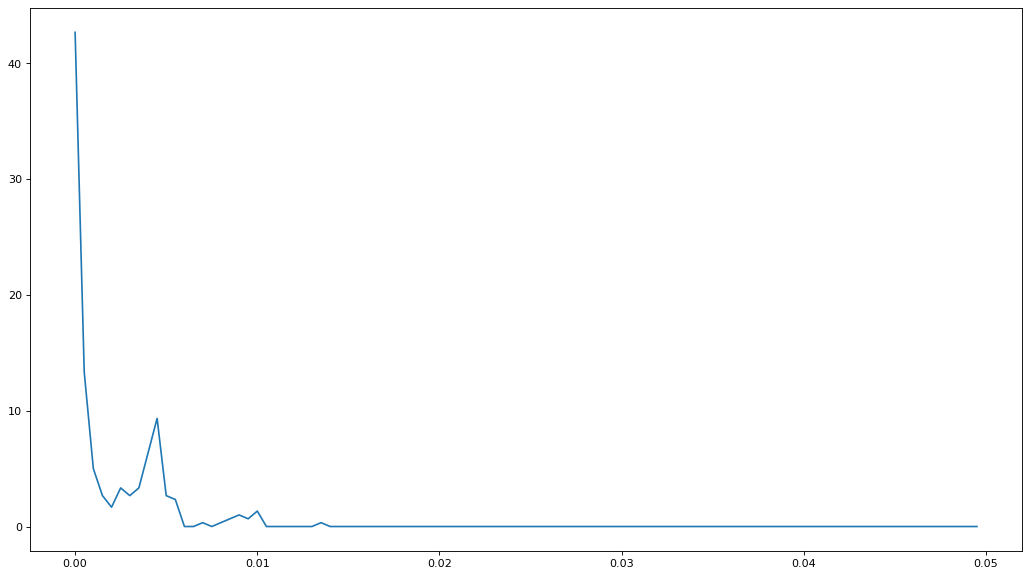

In [20]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')

maxrange = 0.05

data = attack_hmi_diff[:300]
hist, bin_edges = np.histogram(data, bins=100, range=(0.0,maxrange), density=True)
bin_edges = bin_edges[:-1]
prob = hist[:]*maxrange
print(sum(hist))
#print(max(prob))
print(prob)
print(np.sum(prob))
mat = np.vstack((prob,bin_edges))

plt.plot(bin_edges,prob)

1.0000000000000004
1.0000000000000004
normal peaks [0.40898455 0.10564779 0.01628583 0.00140272]
normal valleys [0.05462013 0.00782072 0.00136929]
attack peaks [0.38909335 0.10859764 0.01786749 0.00159494]
attack valleys [6.71542398e-02 7.66102037e-03 1.85100381e-05]
relative [1.05112192 0.97283684 0.91147828]
relative [ 0.81335342  1.02084639 73.97569767]


(-0.02, 0.3)

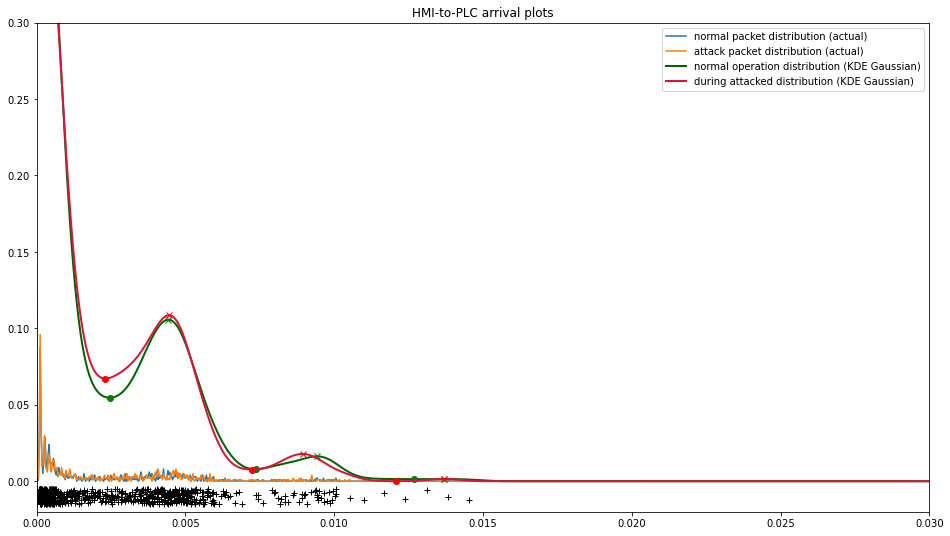

In [21]:
#%matplotlib inline

from numpy import array, linspace
from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
# ----------------------------------------------------------------------
# Plot a 1D density example

maxrange = 0.03
N = 1000
np.random.seed(1)
#X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
#                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X = normal_hmi_diff[:N].reshape(-1,1)
X_beta = attack_hmi_diff[:N].reshape(-1,1)
X_plot = np.linspace(-0.0, maxrange, N)[:, np.newaxis]

#true_dens = (0.3 * norm(0, 0.01).pdf(X_plot[:, 0])
#             + 0.7 * norm(0.1, 0.04).pdf(X_plot[:, 0]))

hist, bin_edges = np.histogram(normal_hmi_diff[:N], bins=N, range=(0.0,maxrange), density=True)
bin_edges = bin_edges[:-1]
true_dens = hist[:]*maxrange*(1/N)
#print(true_dens)
print(np.sum(true_dens))

_hist, _bin_edges = np.histogram(attack_hmi_diff[:N], bins=N, range=(0.0,maxrange), density=True)
_bin_edges = _bin_edges[:-1]
_true_dens = _hist[:]*maxrange*(1/N)
#print(_true_dens)
print(np.sum(_true_dens))

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(X_plot[:, 0], true_dens,label='normal packet distribution (actual)')
ax.plot(X_plot[:, 0], _true_dens,label='attack packet distribution (actual)')

kde = KernelDensity(kernel='gaussian', bandwidth=0.0005).fit(X)
log_dens = kde.score_samples(X_plot)
dens = np.exp(log_dens)/1000
peaks, _ = find_peaks(dens, height=0.001)

valleys, _ = find_peaks(1-dens, height=0.001)

_kde = KernelDensity(kernel='gaussian', bandwidth=0.0005).fit(X_beta)
_log_dens = _kde.score_samples(X_plot)
_dens = np.exp(_log_dens)/1000
_peaks, __ = find_peaks(_dens, height=0.001)

_valleys, __ = find_peaks(1-_dens, height=0.001)

ax.plot(X_plot[:, 0], dens, color='darkgreen', lw=2,
        linestyle='-', label='normal operation distribution (KDE Gaussian)')
ax.plot(X_plot[peaks],dens[peaks], "gx")
ax.plot(X_plot[valleys],dens[valleys], "go")
ax.plot(X_plot[:, 0], _dens, color='crimson', lw=2,
        linestyle='-', label='during attacked distribution (KDE Gaussian)')
ax.plot(X_plot[_peaks],_dens[_peaks], "rx")
ax.plot(X_plot[_valleys],_dens[_valleys], "ro")
print("normal peaks",dens[peaks])
print("normal valleys",dens[valleys])
print("attack peaks",_dens[_peaks])
print("attack valleys",_dens[_valleys])
ax.title.set_text("HMI-to-PLC arrival plots")
print("relative",dens[peaks][:3]/_dens[_peaks][:3])
print("relative",dens[valleys][:3]/_dens[_valleys][:3])
#ax.text(6, 0.38, "N={0} points".format(N))
ax.legend(loc='upper right')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-0.0, maxrange)
ax.set_ylim(-0.02, 0.3)


1.0
1.0000000000000007
normal peaks [0.41287626 0.11140195 0.01828886 0.00191645]
normal valleys [0.05102604 0.00646728 0.00055374]
attack peaks [0.38832291 0.1081465  0.01625203 0.00153226]
attack valleys [6.58044507e-02 7.64557480e-03 2.60618197e-05]
relative [1.0632292  1.03010223 1.1253276 ]
relative [ 0.77541935  0.84588496 21.24725764]


(-0.02, 0.3)

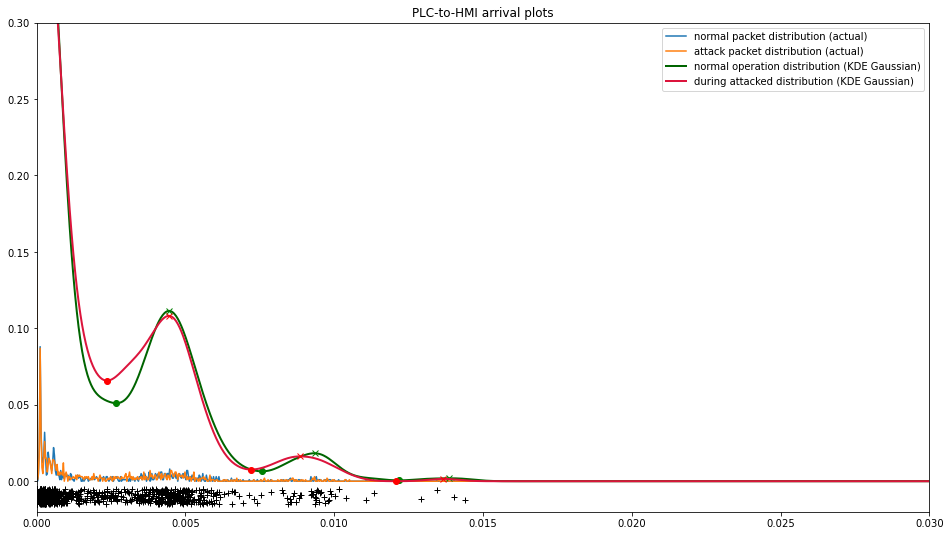

In [22]:
#%matplotlib inline

from numpy import array, linspace
from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
# ----------------------------------------------------------------------
# Plot a 1D density example

maxrange = 0.03
N = 1000
np.random.seed(1)
#X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
#                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X = normal_plc_diff[:N].reshape(-1,1)
X_beta = attack_plc_diff[:N].reshape(-1,1)
X_plot = np.linspace(-0.0, maxrange, N)[:, np.newaxis]

#true_dens = (0.3 * norm(0, 0.01).pdf(X_plot[:, 0])
#             + 0.7 * norm(0.1, 0.04).pdf(X_plot[:, 0]))

hist, bin_edges = np.histogram(normal_plc_diff[:N], bins=N, range=(0.0,maxrange), density=True)
bin_edges = bin_edges[:-1]
true_dens = hist[:]*maxrange*(1/N)
#print(true_dens)
print(np.sum(true_dens))

_hist, _bin_edges = np.histogram(attack_plc_diff[:N], bins=N, range=(0.0,maxrange), density=True)
_bin_edges = _bin_edges[:-1]
_true_dens = _hist[:]*maxrange*(1/N)
#print(_true_dens)
print(np.sum(_true_dens))

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(X_plot[:, 0], true_dens,label='normal packet distribution (actual)')
ax.plot(X_plot[:, 0], _true_dens,label='attack packet distribution (actual)')

kde = KernelDensity(kernel='gaussian', bandwidth=0.0005).fit(X)
log_dens = kde.score_samples(X_plot)
dens = np.exp(log_dens)/1000
peaks, _ = find_peaks(dens, height=0.001)

valleys, _ = find_peaks(1-dens, height=0.001)

_kde = KernelDensity(kernel='gaussian', bandwidth=0.0005).fit(X_beta)
_log_dens = _kde.score_samples(X_plot)
_dens = np.exp(_log_dens)/1000
_peaks, __ = find_peaks(_dens, height=0.001)

_valleys, __ = find_peaks(1-_dens, height=0.001)

ax.plot(X_plot[:, 0], dens, color='darkgreen', lw=2,
        linestyle='-', label='normal operation distribution (KDE Gaussian)')
ax.plot(X_plot[peaks],dens[peaks], "gx")
ax.plot(X_plot[valleys],dens[valleys], "go")
ax.plot(X_plot[:, 0], _dens, color='crimson', lw=2,
        linestyle='-', label='during attacked distribution (KDE Gaussian)')
ax.plot(X_plot[_peaks],_dens[_peaks], "rx")
ax.plot(X_plot[_valleys],_dens[_valleys], "ro")
print("normal peaks",dens[peaks])
print("normal valleys",dens[valleys])
print("attack peaks",_dens[_peaks])
print("attack valleys",_dens[_valleys])
print("relative",dens[peaks][:3]/_dens[_peaks][:3])
print("relative",dens[valleys][:3]/_dens[_valleys][:3])
ax.title.set_text("PLC-to-HMI arrival plots")
#ax.text(6, 0.38, "N={0} points".format(N))
ax.legend(loc='upper right')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-0.0, maxrange)
ax.set_ylim(-0.02, 0.3)